In [41]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import scipy.stats as stats

### Part 1

#### Show how the energy distribution histogram changes for electrons and neutrons of the same initial energy. [1 mark]

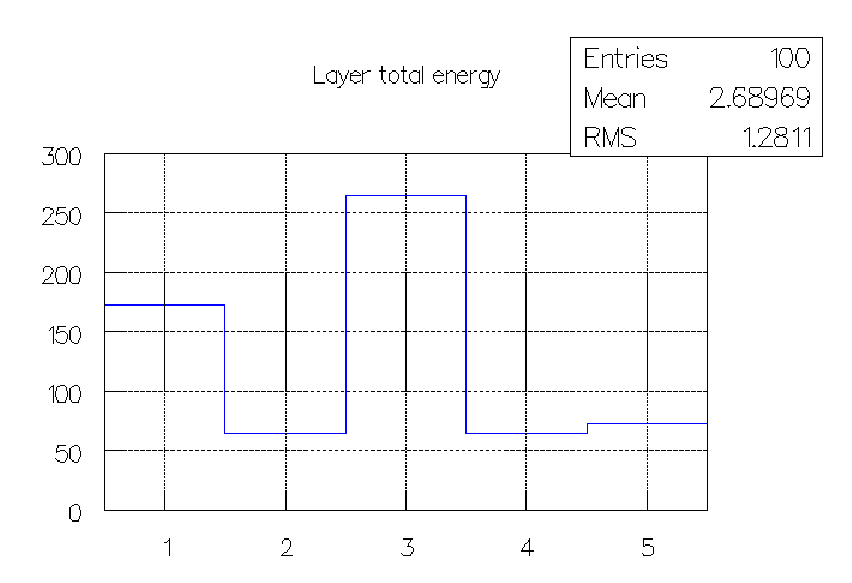

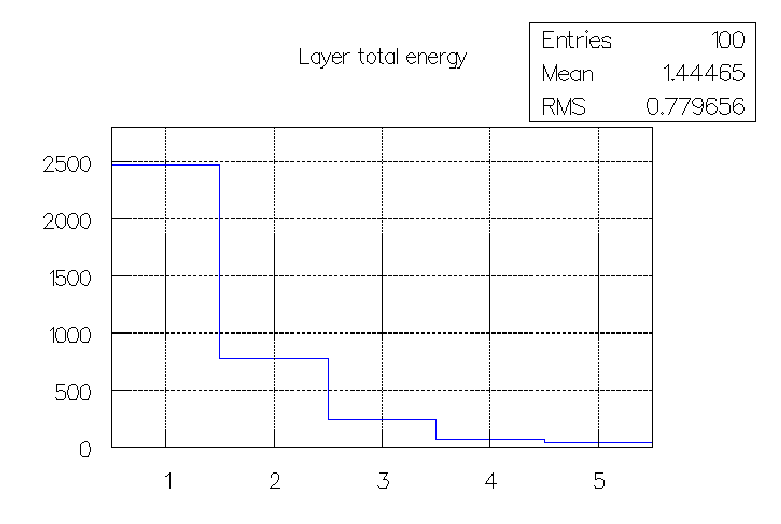

In [59]:
from IPython.display import Image
display(Image(filename='neutrondist.png'))
display(Image(filename='electrondist.png'))


Here are two histograms output from the c++ program, showing the energy distribution of a) a neutron and b) an electron when fired at a sampling calorimeter consisting of thin layers of lead, and larger sensitive volumes of liquid argon. You can see that neutrons deposit their energy evenly, where the mean energy the layers absorb is 2.69. Electrons deposit most of there energy in the first layer, where they hit the lead plate and are mostly absorbed, and there is less energy deposited throughout the rest of the calorimeter. The mean energy is 1.444.

In [ ]:
#electron data
0,0,0,0,0
20,2465.33,339340,2465.33,2465.33
20,770.577,49858.2,1541.15,3082.31
20,246.591,6440.1,739.774,2219.32
20,61.7398,510.195,246.959,987.837
20,35.7064,350.365,178.532,892.659
0,0,0,0,0

In [ ]:
#neutron data
0,0,0,0,0
20,172.54,19080.1,172.54,172.54
20,64.6225,1298.89,129.245,258.49
20,264.8,34417.8,794.4,2383.2
20,64.9745,1782.34,259.898,1039.59
20,73.0642,4136.18,365.321,1826.61
0,0,0,0,0

#### Write a Python program to calibrate your energy data. Plot a 1D histogram of the calibrated energy as shown, and find the resolution by taking the standard deviation of this data. [1 mark]

In [11]:
import pandas as pd
#accidentally overwrote the datafile do not rerun!
#input data from the file output by c++ which gives energy as an n tuple with each layer
inputData = pd.read_csv( 'output_nt_Energy.csv', comment='#', \
names=['TrueEnergy', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5'] )

In [21]:
#true energy is the energy the particles were fired at (300MeV)
ETrue = inputData['TrueEnergy']

In [22]:
#detected energy is the sum of the energy detected by each layer
EDetected = inputData['Layer1']+inputData['Layer2']+inputData['Layer3']+inputData['Layer4']+inputData['Layer5']

In [31]:
#calibration factor is the mean of true energy over detected energy
calibration = np.mean(ETrue/EDetected)

In [35]:
#get calibrated energy
ECalibrated = calibration*EDetected

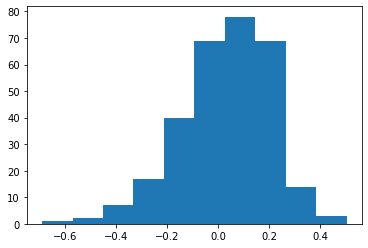

In [40]:
#get calibrated data and get the resolution as the standard devation of the histogram
calibrated_data = (ECalibrated - ETrue)/ETrue
plt.hist(calibrated_data)
plt.show()

In [63]:
calibrated_data

0      0.182198
1      0.021481
2      0.263874
3      0.085456
4      0.183028
         ...   
295   -0.229888
296    0.128452
297   -0.000639
298   -0.106016
299    0.013472
Length: 300, dtype: float64

In [65]:
np.savetxt('part1.2data.csv', calibrated_data, delimiter=',')

In [45]:
#get the resolution as the deviation of calibrated data
_,resolution = stats.norm.fit(calibrated_data, loc=0,scale=1)
resolution

0.17654738071070053

#### Make a 2D histogram showing how your calibrated energy varies with beam energy. Describe what beam energy values you used. [2 marks]

I used 200MeV starting energy, increasing by 80MeV each time for 1000 events.

In [60]:
inputData = pd.read_csv( 'output_nt_Energy.csv', comment='#', \
names=['TrueEnergy', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5'] )

In [62]:
inputData

,TrueEnergy,Layer1,Layer2,Layer3,Layer4,Layer5
0,200,77.7669,50.1197,8.32513,0.000000,0.00000
1,280,85.0312,31.3669,1.86268,0.000000,0.00000
2,360,99.6148,54.7934,34.63260,5.938790,0.00000
3,440,74.3205,113.1540,55.23430,1.531730,0.00000
4,520,183.8270,72.3393,14.25920,0.505203,4.42809
...,...,...,...,...,...,...
995,79800,3739.7400,14840.5000,16319.30000,8742.780000,3942.55000
996,79880,2411.8800,13833.6000,17136.90000,10178.100000,4178.83000
997,79960,2193.6900,16413.8000,17783.20000,8534.260000,3342.85000
998,80040,4043.9600,15421.6000,16579.00000,7831.600000,4030.55000


In [88]:
#repeat steps before, getting a calibration for each row
ETrue = inputData['TrueEnergy']
EDetected = np.sum((inputData['Layer1'],inputData['Layer2'],inputData['Layer3'],inputData['Layer4'],inputData['Layer5']),axis=0)

print(np.shape(EDetected))
calibration = np.mean(ETrue/EDetected)
ECalibrated = calibration*EDetected
calibration_quality = (ECalibrated - ETrue)/ETrue

(1000,)


In [89]:
calibration_quality

0      0.146091
1     -0.289249
2     -0.088574
3     -0.065886
4     -0.108892
         ...   
995    0.003461
996    0.005710
997    0.015826
998    0.007219
999   -0.055960
Name: TrueEnergy, Length: 1000, dtype: float64

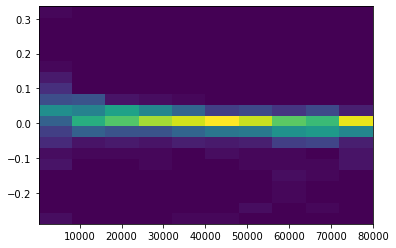

In [93]:
#plot the 2d data as a histogram for every true data where x is true energy and y is the calibration quality
pl.hist2d( x=inputData['TrueEnergy'], y=calibration_quality, bins=(10, 20) )
pl.show()

### Part 2

#### Count the number of positrons produced by photon conversion in an event. [1 mark]

To get the number of positrons I had to edit the source code to count positrons from photo conversion - from Geant4 event 'conv' , and particle 'e+'

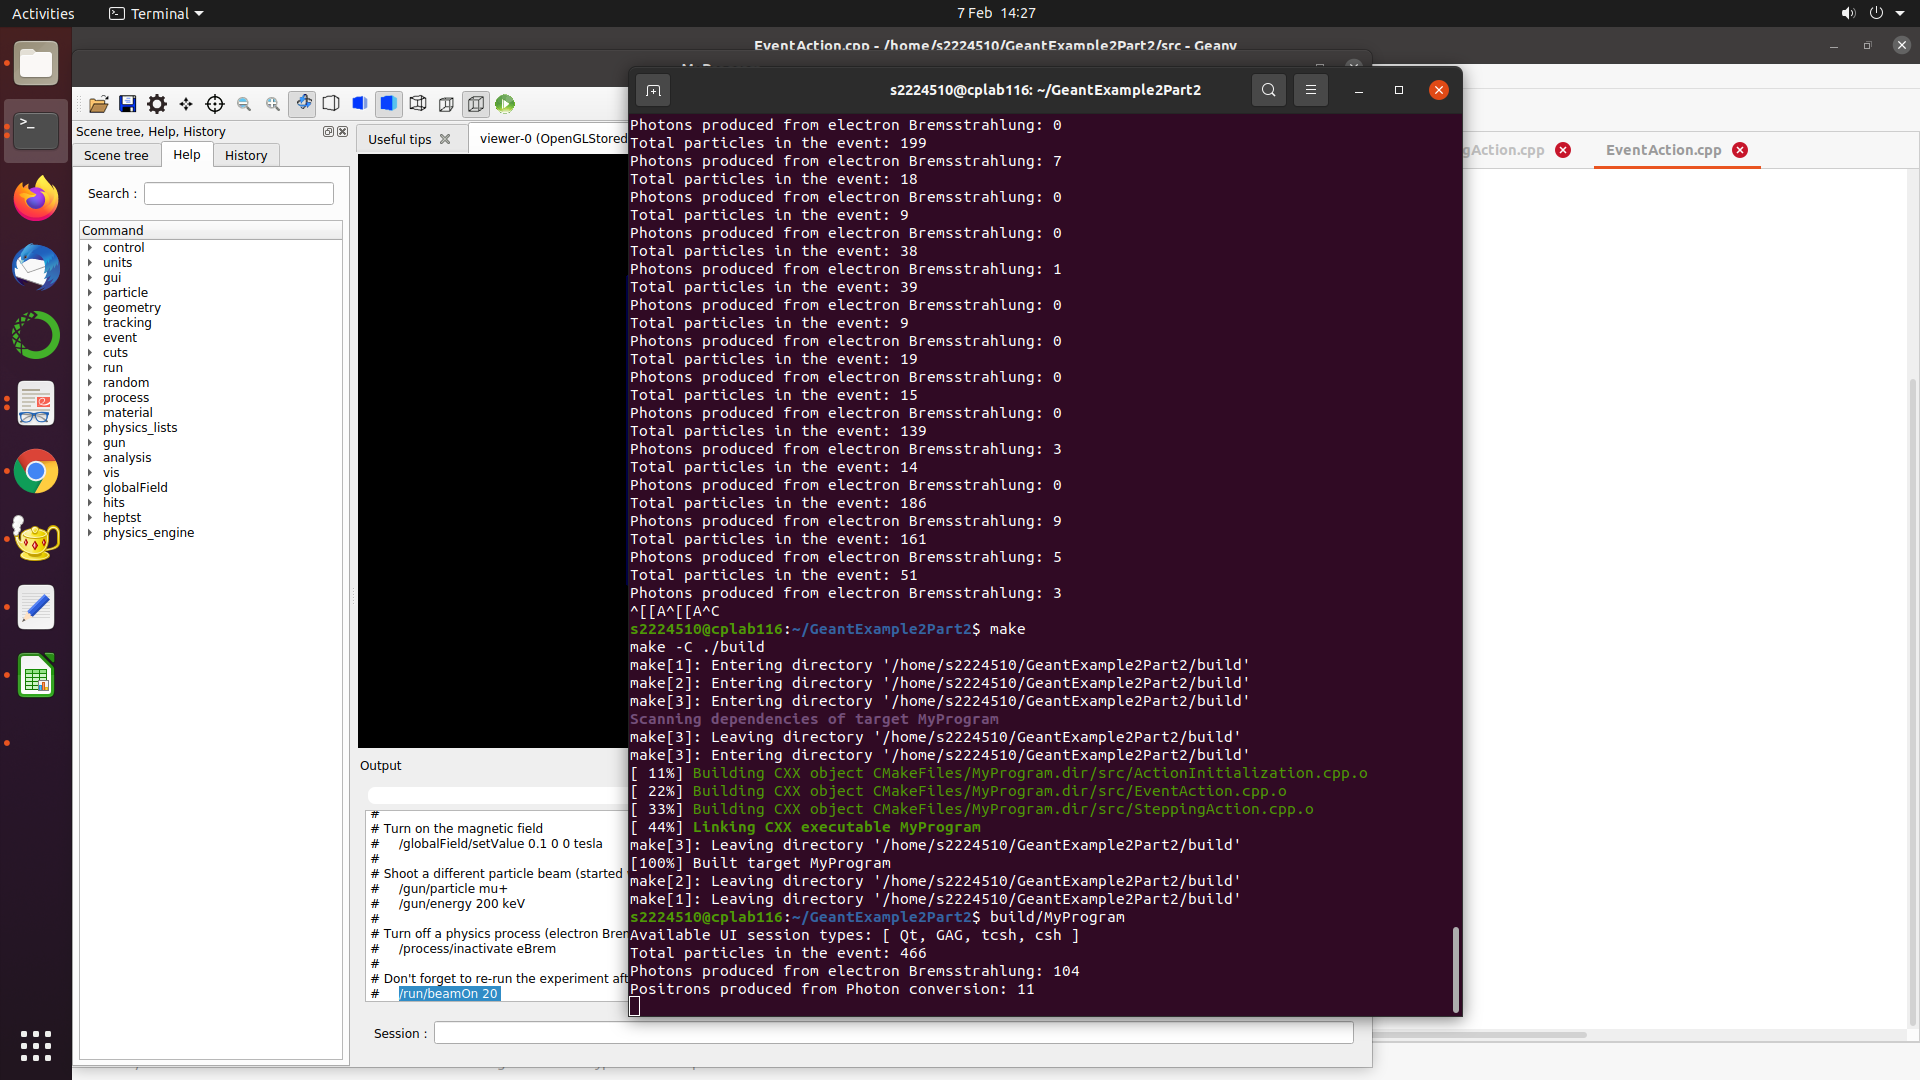

In [94]:
display(Image(filename='part2.1.png'))


#### Calculate the fraction of the total *detected* energy in an event that was deposited by electrons. [1 mark]

To get this, three source code files had to be editted to include a new histogram which just gets energy from the electrons.

In [113]:
#get total energy
totalenergy2 = np.loadtxt('output_nt_Energy2.csv',delimiter=',')

In [114]:
#get electron 
electronenergy2 = np.loadtxt('output_nt_Electron Energy2.csv',delimiter=',')

In [116]:
#sum of energies (not including true energy)
Tenergydetected = np.sum(totalenergy2[1:])

In [117]:
#sum of electron energies (not including true energy)
Eenergydetected = np.sum(electronenergy2[1:])

In [118]:
#fraction
fraction = Eenergydetected/Tenergydetected

In [119]:
fraction

0.6347571421424033

fraction is 63%, i.e. electron energy detected is ~2/3 of the whole energy detected. 